# Mart Sales Prediction

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 26-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [BigMart Sales Data](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data)

## Project Overview
In this project, we aim to predict sales in a retail store using various machine learning techniques. We'll explore the dataset, preprocess it, perform Exploratory Data Analysis (EDA), and finally, train and evaluate a predictive model. This notebook includes visualizations, data transformations, model training, and error analysis to understand our model’s performance and improve its accuracy.

## 1. Importing Libraries

In [189]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and Exploring Data

In [190]:
# Loading and reviewing the dataset
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [191]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Observation:
* Categorical features: Item_Identifier, Item_Fat_Content, Outlet_Type, etc.
* Numerical features: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

## 3. Data Cleaning and Preprocessing

In [192]:
# Check for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Observation: 
* columns with missing values to handle them appropriately.

In [193]:
# handling missing values
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

In [194]:
# Summary statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Visualizing Distributions of Numerical Features

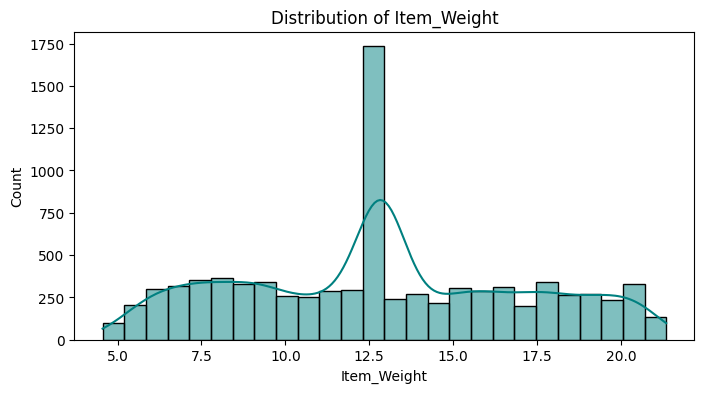

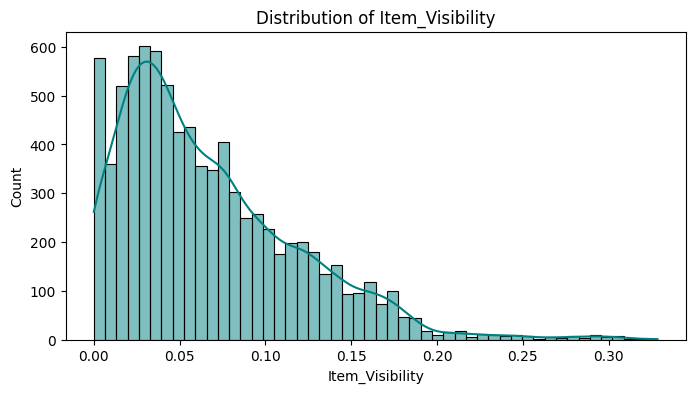

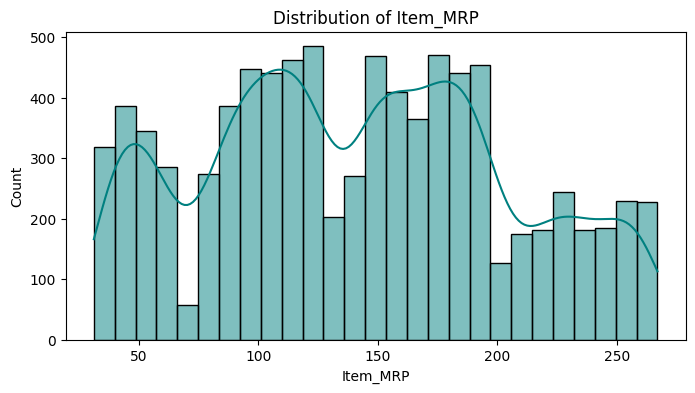

In [195]:
# Plotting distribution of numerical features
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], color='teal', kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Observations:
* We have observe distributions and noted any skewness or potential outliers.

### Outlet Establishment Year Distribution

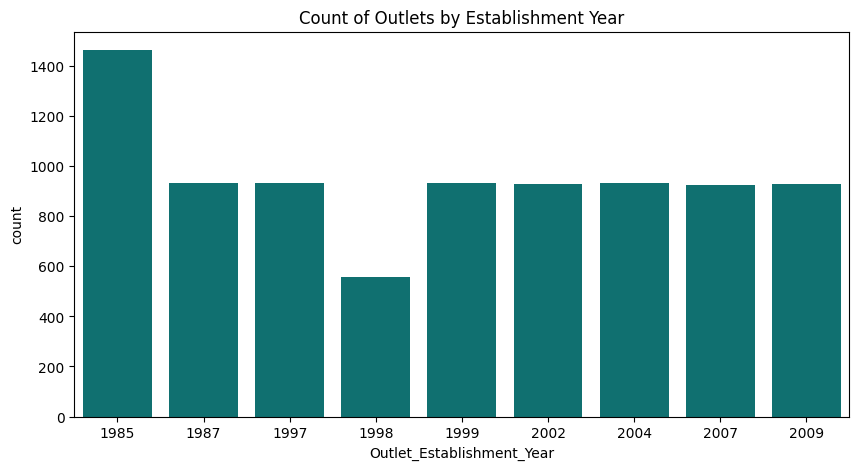

In [196]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Outlet_Establishment_Year'], color='teal')
plt.title('Count of Outlets by Establishment Year')
plt.show()

### Observation: 
* This plot helps in understanding the spread of outlet establishments over the years.

## 5. Feature Encoding

In [197]:
# Label encoding
le = LabelEncoder()
categorical_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                    'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### Observation: 
* Categorical features have been encoded to numerical values for modeling purposes.

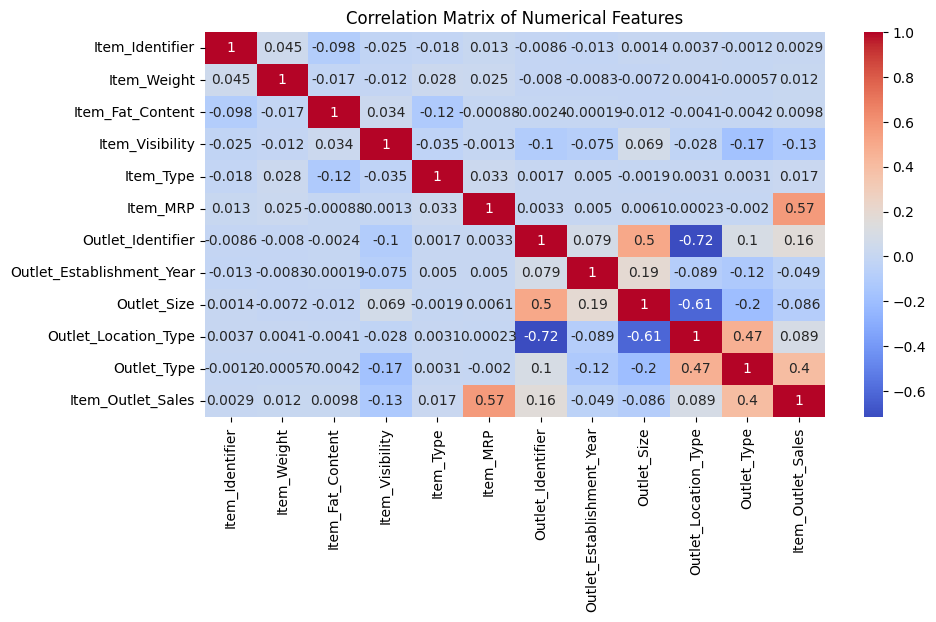

In [198]:
# Plotting correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observation: 
* Analyzing correlations can reveal relationships and provide insights for feature selection.

## 6. Modeling and Evaluation

In [199]:
# splitting the data into features and target
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [200]:
# training the model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [203]:
# Predicting and evaluating
y_pred = model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.root_mean_squared_error(y_test, y_pred))

print('R2 score:', r2)
print('Root Mean Squared Error (RMSE):', rmse)


R2 score: 0.5227852346984326
Root Mean Squared Error (RMSE): 33.74734687875422


Observavtion:

## Summary:
In this project, we analyzed the BigMart Sales data and developed a machine learning model to predict store sales. Key steps included data cleaning, exploratory analysis, and feature encoding, followed by training an XGBoost model. The model was evaluated with R2 and RMSE, providing insight into its predictive performance. Future steps could include fine-tuning the model using hyperparameter optimization, experimenting with other algorithms, or enriching the dataset with additional features